#### Avacado Project

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Avacado-Project/Data/avacado.csv")

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


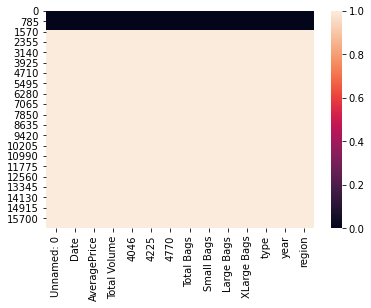

In [4]:
sns.heatmap(data.isnull())

In [5]:
#above 90% of the rows are completely null, we can drop all these rows

In [6]:
data.dropna(how='all', inplace=True)

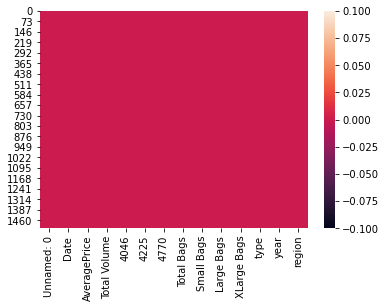

In [7]:
sns.heatmap(data.isnull())

In [8]:
data = data.iloc[:,1:]

In [9]:
data.select_dtypes(include=['object']).columns

Index(['Date', 'type', 'region'], dtype='object')

In [10]:
data.type.nunique()

1

In [11]:
#since type has only one value, we can drop that
data.drop("type", inplace=True, axis=1)

In [12]:
data.region.nunique()

51

In [13]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


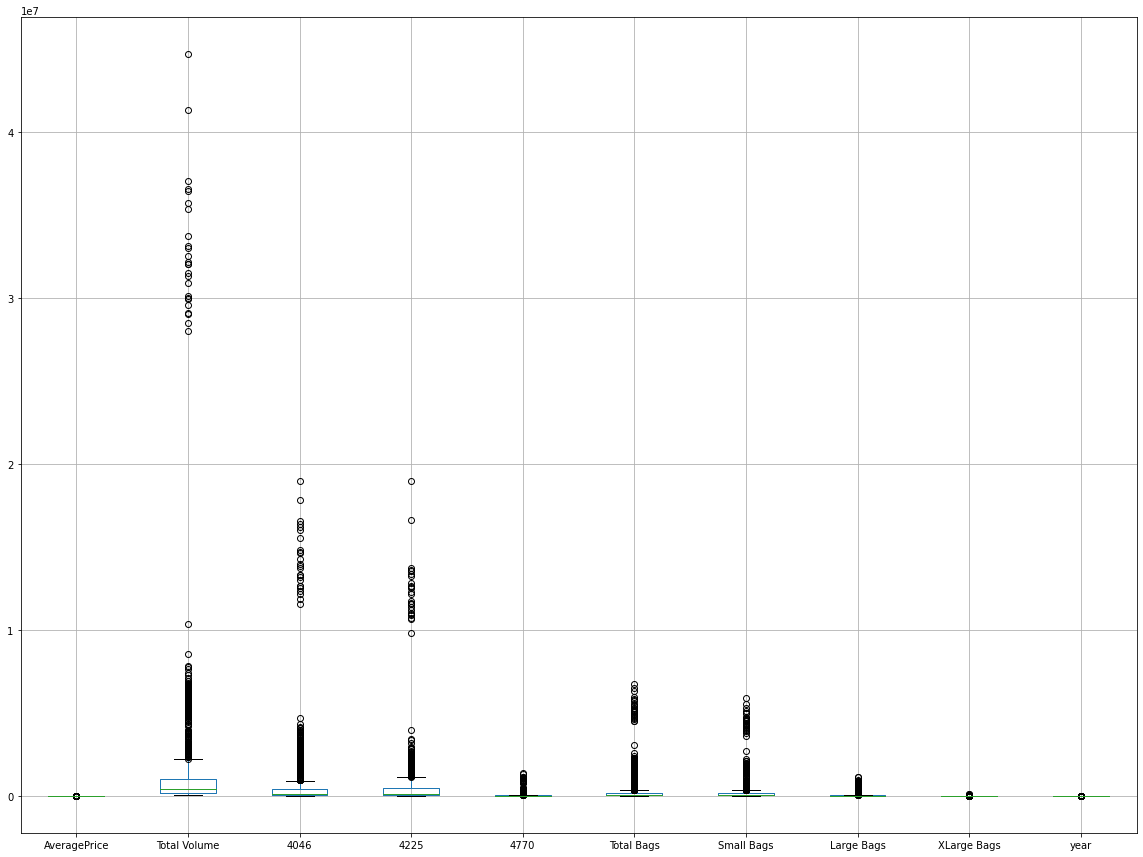

In [14]:
plt.figure(figsize=(20,15))
data.boxplot()

In [15]:
#there are outliers in almost all columns

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


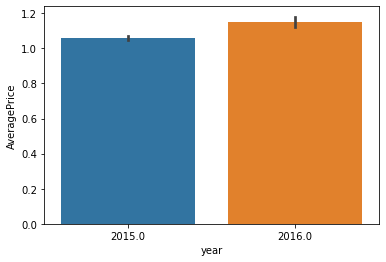

In [16]:
sns.barplot(data["year"], data["AveragePrice"])

In [17]:
#the average price has increased in 2016

In [18]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day
data.drop("Date", inplace=True, axis=1)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


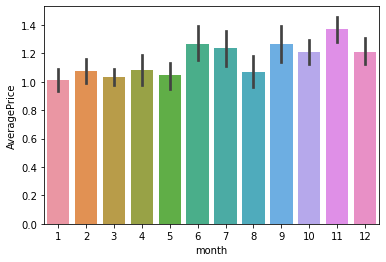

In [19]:
sns.barplot(data[data.year == 2016].month, data[data.year == 2016]["AveragePrice"] )

In [20]:
#highest avg. price was in November

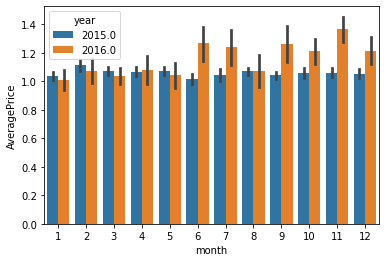

In [21]:
sns.barplot(x=data.month, y=data.AveragePrice, hue=data.year)

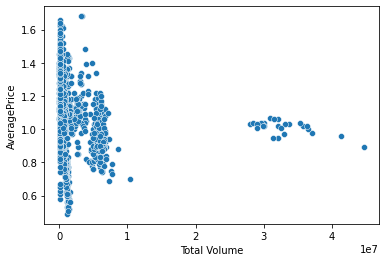

In [22]:
sns.scatterplot(x=data["Total Volume"], y=data.AveragePrice)

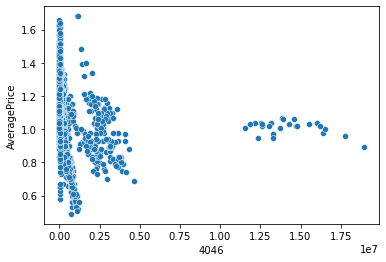

In [23]:
sns.scatterplot(x=data["4046"], y=data.AveragePrice)

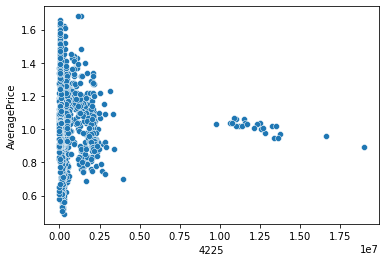

In [24]:
sns.scatterplot(x=data["4225"], y=data.AveragePrice)

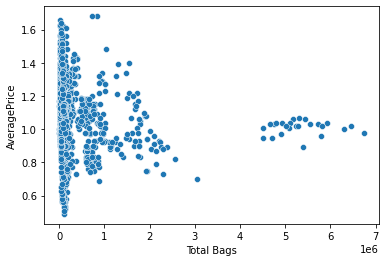

In [25]:
sns.scatterplot(x=data["Total Bags"], y=data.AveragePrice)

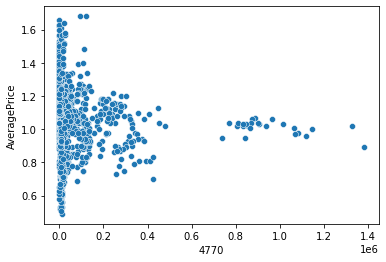

In [26]:
sns.scatterplot(x=data["4770"], y=data.AveragePrice)

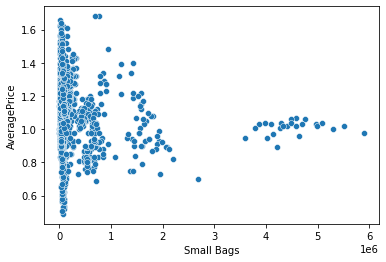

In [27]:
sns.scatterplot(x=data["Small Bags"], y=data.AveragePrice)

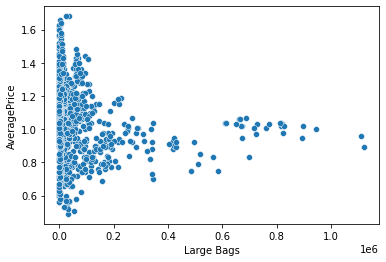

In [28]:
sns.scatterplot(x=data["Large Bags"], y=data.AveragePrice)

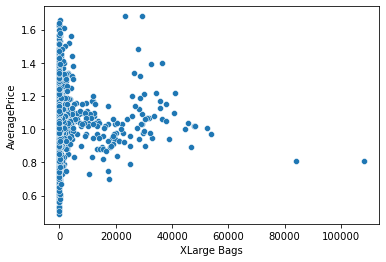

In [29]:
sns.scatterplot(x=data["XLarge Bags"], y=data.AveragePrice)

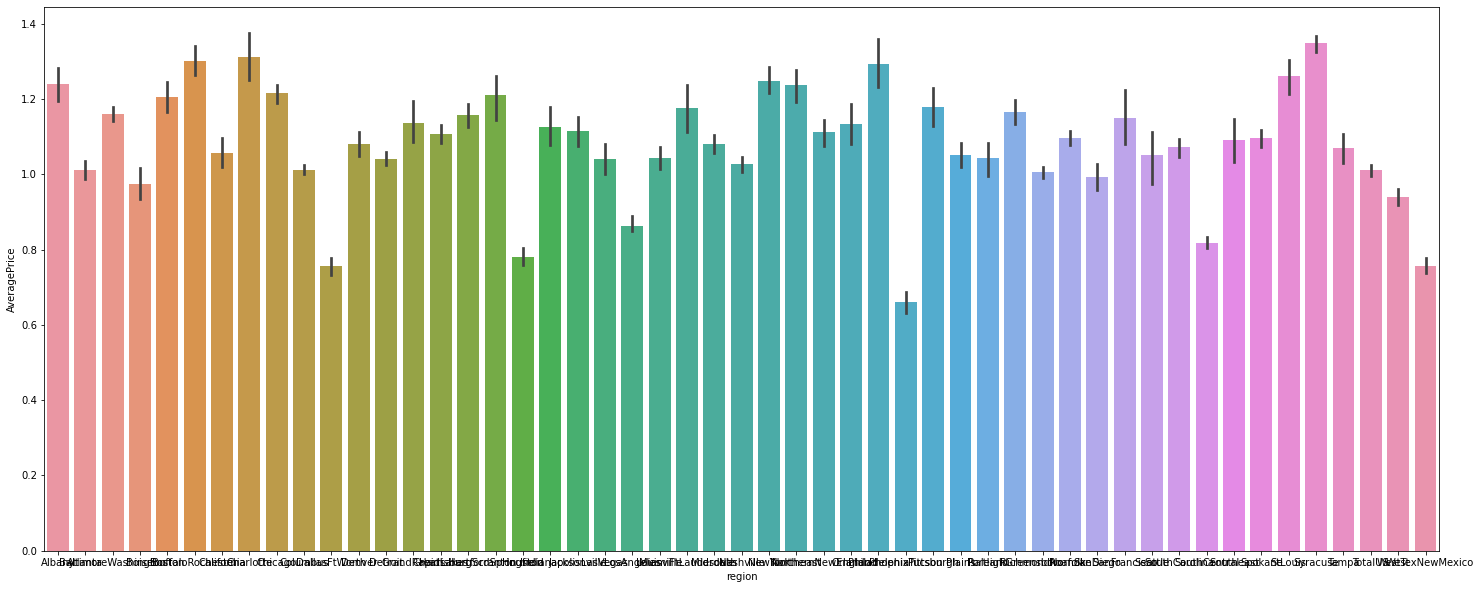

In [30]:
plt.figure(figsize=(25,10))
sns.barplot(x=data["region"], y=data.AveragePrice)

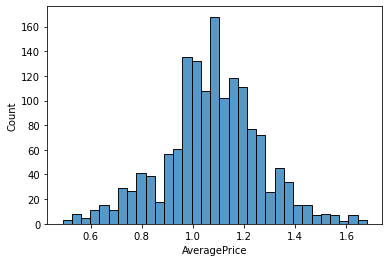

In [31]:
sns.histplot(data.AveragePrice)

In [32]:
#The avgg price of avacado lies b/w 1 and 1.2 most of the time

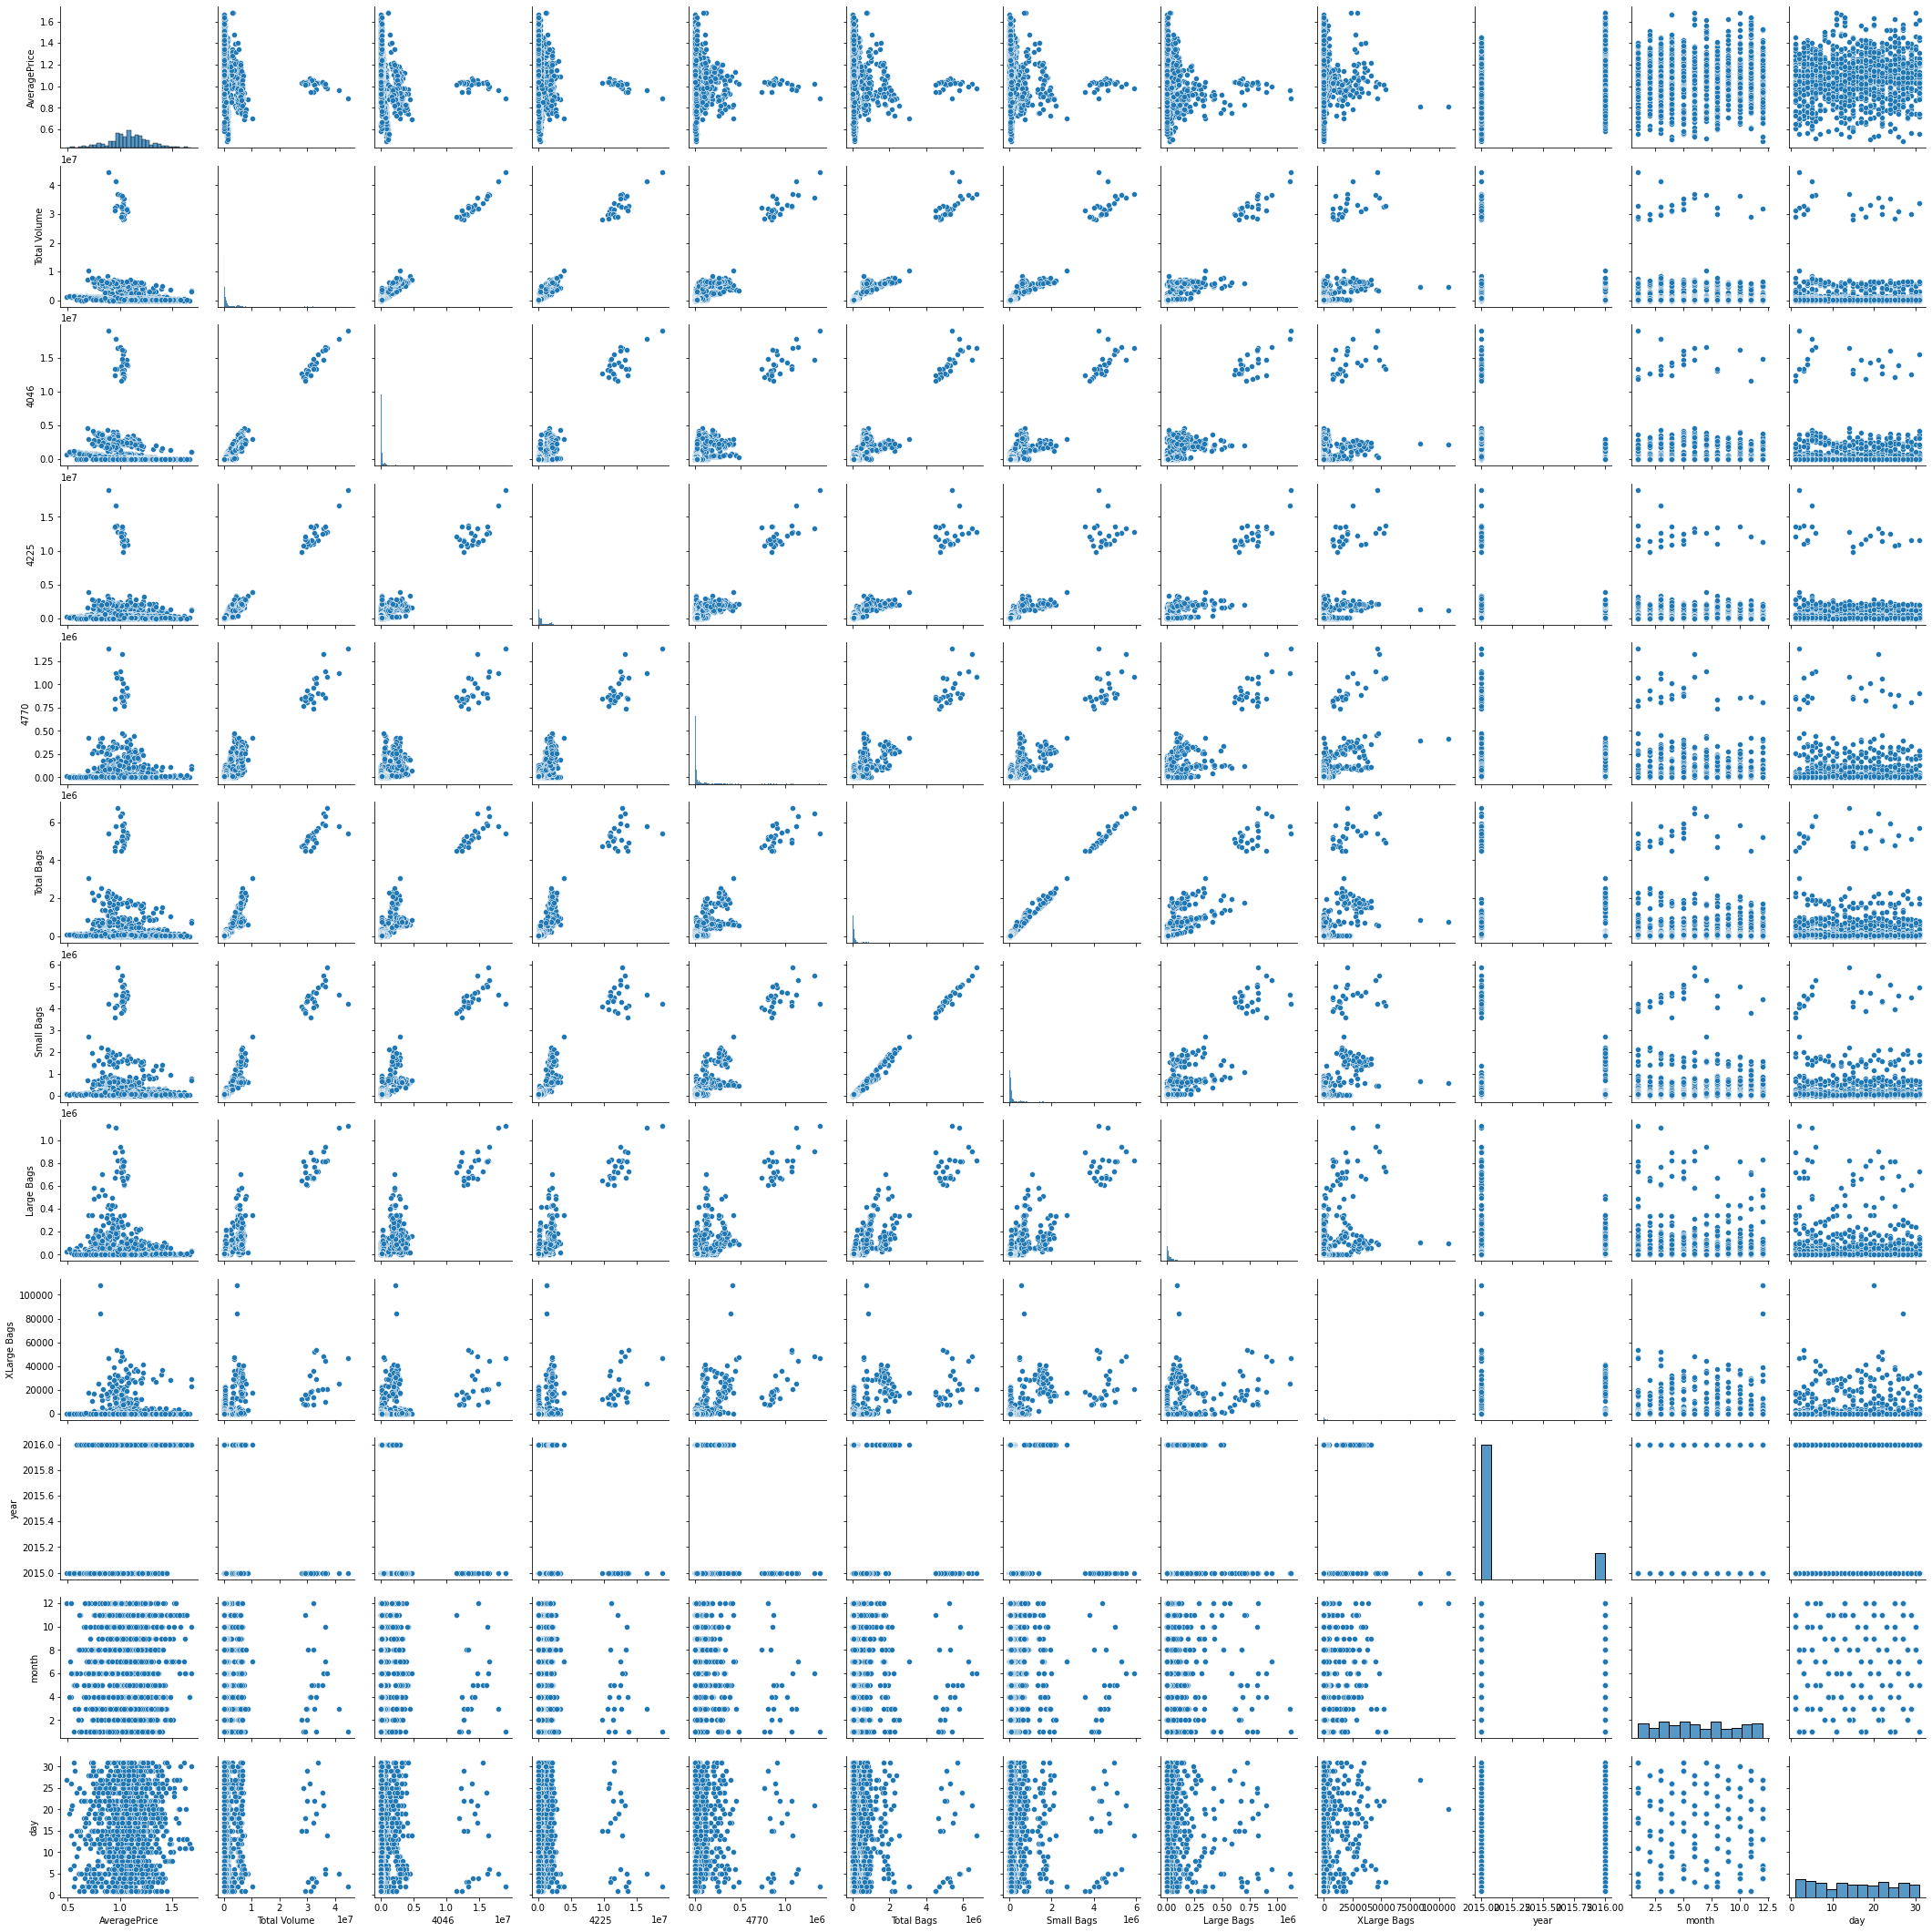

In [33]:
sns.pairplot(data)

In [34]:
cor = data.corr()

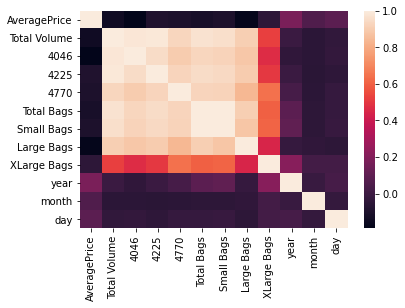

In [35]:
sns.heatmap(cor)

In [36]:
data.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
month           0.101439
day             0.041303
dtype: float64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

In [39]:
data["region"] = le.fit_transform(data["region"])

In [40]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [41]:
avacado = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
avacado.skew()

AveragePrice   -0.439212
Total Volume    1.191106
4046            1.777646
4225            2.047410
4770            2.096018
Total Bags      1.692967
Small Bags      1.792265
Large Bags      1.818090
XLarge Bags     3.510765
year            0.000000
region         -0.092527
month           0.104232
day             0.038435
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform
columns = ["Total Volume", "4046", "4225", "4770", "Total Bags", "Small Bags", "Large Bags",
           "XLarge Bags"]
for i in columns:
   avacado[i] = power_transform(np.array(avacado[i]).reshape(-1,1)) 

<ipython-input-43-c28694ec3276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avacado[i] = power_transform(np.array(avacado[i]).reshape(-1,1))
<ipython-input-43-c28694ec3276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avacado[i] = power_transform(np.array(avacado[i]).reshape(-1,1))
<ipython-input-43-c28694ec3276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [44]:
avacado.skew()

AveragePrice   -0.439212
Total Volume   -0.017214
4046           -0.129865
4225            0.003441
4770           -0.098913
Total Bags     -0.022877
Small Bags     -0.015513
Large Bags     -0.237573
XLarge Bags     1.061893
year            0.000000
region         -0.092527
month           0.104232
day             0.038435
dtype: float64

In [45]:
avacado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,-1.465808,-1.612085,-0.317062,-1.572724,-1.779793,-1.660784,-1.046865,-0.61303,2015.0,0,12,27
1,1.35,-1.621809,-1.722379,-0.481087,-1.513766,-1.706197,-1.573977,-1.037037,-0.61303,2015.0,0,12,20
2,0.93,-0.849334,-1.681270,0.253969,-1.249214,-1.833197,-1.725818,-1.024464,-0.61303,2015.0,0,12,13
3,1.08,-1.259021,-1.588462,-0.087453,-1.444647,-2.097708,-2.054696,-0.964657,-0.61303,2015.0,0,6,12
4,1.28,-1.693192,-1.637555,-0.496035,-1.430768,-2.050322,-2.005381,-0.869035,-0.61303,2015.0,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0.71,1.369641,1.598776,0.768582,0.923138,0.596767,0.778131,0.125119,-0.61303,2015.0,50,1,2
1266,0.80,1.097118,1.461938,0.359895,0.751785,0.281935,0.501800,-0.182957,-0.61303,2015.0,50,1,25
1267,0.80,1.111114,1.457642,0.386987,0.849264,0.381644,0.614298,-0.434316,-0.61303,2015.0,50,1,18
1268,0.92,0.862691,1.141621,0.395076,1.353357,0.508628,0.724793,-0.218123,-0.61303,2015.0,50,11,1


In [46]:
y = avacado.iloc[:,0]

In [47]:
x = avacado.iloc[:,1:]

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [49]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 15


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 15)

In [51]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': -0.003687992243929461, 'KNN': 0.4422712300452273, 'RandomForest': 0.8830946447771625, 'LinearRegression': 0.5764571898820523, 'Ridge': 0.57641340949363, 'dtr': 0.8033040141844421}


In [52]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [53]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': -0.04347191222746442, 'KNeighborsRegressor()': -0.36445164177565725, 'RandomForestRegressor()': 0.17936032210428246, 'LinearRegression()': 0.0506071685929838, 'Ridge()': 0.054572865872887295, 'DecisionTreeRegressor()': -0.30008811020984466}


In [54]:
#Randomforest is the best model

In [55]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [57]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=7)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_

In [ ]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [ ]:
r2_score(y_test, GCV_predict)

In [ ]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "Avacado.obj")